In [37]:
# Standard Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import eli5

# Transformers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from IPython.display import display, Markdown

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as PipeImb
from imblearn.pipeline import make_pipeline

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier


#Validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Sampling methods
from imblearn.over_sampling import SMOTE,SMOTENC

from urchin_workflow import urchin_supervised_classification as usc
from urchin_workflow import urchin_supervised_preprocessing as usp


In [24]:
df=pd.read_csv(r"Data\4b.IBM_data_cleaned_dropped - Copy - Copy.csv")
y_name='attrition'


In [25]:
df=usp.a_remove_outliers(df)

Remove outliers
# rows before removal 1470
# rows after outliers removed 1425



In [26]:
x_train, y_train, x_train_scaled, x_test_scaled, y_test, x_test=usp.e_prep_xy(df,y_name)

In [38]:
xylist=usp.f_xysplit_compile(x_train_scaled,x_test_scaled,y_train,y_test)
smote = SMOTE()
x_train_scaled, y_train = smote.fit_resample(x_train_scaled, y_train)

In [40]:
y_train.value_counts()
xylist=usp.f_xysplit_compile(x_train_scaled,x_test_scaled,y_train,y_test)


In [41]:
temp=usc.ba_RFE_best_n(xylist)


RFE suggests 45 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_research & development', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'cat__maritalstatus_single', 'cat__overtime_yes', 'num__age', 'num__distancefromhome', 'num__education', 'num__environmentsatisfaction', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfact

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.6, 0.64, 0.6, 0.58, 0.63]","accuracy: 0.61, stdev: 0.02","[0.65, 0.76, 0.74, 0.68, 0.75]","accuracy: 0.72, stdev: 0.04"





RFE suggests 44 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_research & development', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'cat__maritalstatus_single', 'cat__overtime_yes', 'num__age', 'num__distancefromhome', 'num__education', 'num__environmentsatisfaction', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfa

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.63, 0.77, 0.77, 0.73, 0.78]","accuracy: 0.74, stdev: 0.06","[0.69, 0.73, 0.73, 0.74, 0.81]","accuracy: 0.74, stdev: 0.04"





RFE suggests 43 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_research & development', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'cat__maritalstatus_single', 'num__age', 'num__distancefromhome', 'num__education', 'num__environmentsatisfaction', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockop

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.66, 0.83, 0.79, 0.79, 0.79]","accuracy: 0.77, stdev: 0.06","[0.74, 0.74, 0.8, 0.74, 0.8]","accuracy: 0.77, stdev: 0.03"





RFE suggests 42 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_research & development', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'cat__maritalstatus_single', 'num__age', 'num__distancefromhome', 'num__education', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimesl

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.7, 0.89, 0.89, 0.88, 0.85]","accuracy: 0.84, stdev: 0.07","[0.78, 0.7, 0.73, 0.71, 0.73]","accuracy: 0.73, stdev: 0.03"





RFE suggests 41 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'cat__maritalstatus_single', 'num__age', 'num__distancefromhome', 'num__education', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimeslastyear', 'num__worklifebalance', 'num__ye

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.72, 0.89, 0.87, 0.89, 0.85]","accuracy: 0.84, stdev: 0.06","[0.74, 0.71, 0.76, 0.74, 0.69]","accuracy: 0.73, stdev: 0.02"





RFE suggests 40 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'num__age', 'num__distancefromhome', 'num__education', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimeslastyear', 'num__worklifebalance', 'num__yearsatcompany', 'num__yearsinc

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.73, 0.91, 0.9, 0.89, 0.89]","accuracy: 0.87, stdev: 0.07","[0.79, 0.7, 0.73, 0.75, 0.72]","accuracy: 0.74, stdev: 0.03"





RFE suggests 39 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'num__age', 'num__education', 'num__jobinvolvement', 'num__joblevel', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimeslastyear', 'num__worklifebalance', 'num__yearsatcompany', 'num__yearsincurrentrole', 'num__yearss

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.72, 0.9, 0.9, 0.91, 0.88]","accuracy: 0.86, stdev: 0.07","[0.74, 0.69, 0.73, 0.75, 0.75]","accuracy: 0.73, stdev: 0.02"





RFE suggests 38 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'num__age', 'num__education', 'num__jobinvolvement', 'num__jobsatisfaction', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimeslastyear', 'num__worklifebalance', 'num__yearsatcompany', 'num__yearsincurrentrole', 'num__yearssincelastpromotion

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.71, 0.9, 0.91, 0.89, 0.89]","accuracy: 0.86, stdev: 0.07","[0.73, 0.67, 0.77, 0.79, 0.72]","accuracy: 0.74, stdev: 0.04"





RFE suggests 37 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'num__age', 'num__education', 'num__jobinvolvement', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimeslastyear', 'num__worklifebalance', 'num__yearsatcompany', 'num__yearsincurrentrole', 'num__yearssincelastpromotion', 'num__yearswithcurrma

,model,train_scores,train_result,test_scores,test_result
0,DecisionTreeClassifier(random_state=1234),"[0.74, 0.89, 0.9, 0.9, 0.89]","accuracy: 0.86, stdev: 0.06","[0.71, 0.74, 0.78, 0.74, 0.73]","accuracy: 0.74, stdev: 0.02"


In [42]:
temp

,num_n,accuracy
6,6.0,0.80
7,7.0,0.80
8,8.0,0.80
9,9.0,0.80
4,4.0,0.79
5,5.0,0.79
3,3.0,0.77
2,2.0,0.74
1,1.0,0.66


In [44]:
mod,keep,remove=usc.bb_feature_selection_RFE(xylist,9)


RFE suggests 37 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'num__age', 'num__education', 'num__jobinvolvement', 'num__numcompaniesworked', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__stockoptionlevel', 'num__trainingtimeslastyear', 'num__worklifebalance', 'num__yearsatcompany', 'num__yearsincurrentrole', 'num__yearssincelastpromotion', 'num__yearswithcurrmana

In [47]:
x_test_scaled=x_test_scaled[keep]
x_train_scaled=x_train_scaled[keep]

Minimum error:- 0.2336448598130841 at K = 1


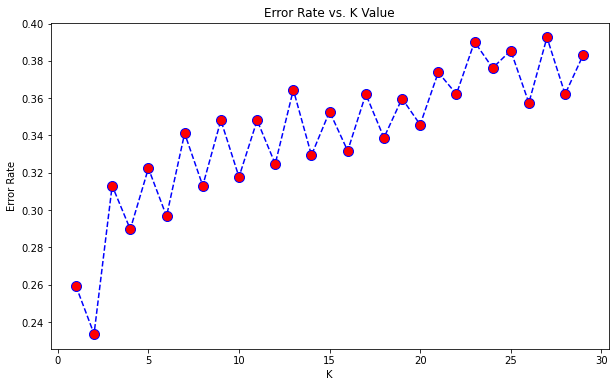

In [48]:
usc.ca_check_knn_error_rate(xylist)b

Maximum accuracy:- 0.6818181818181818 at K = 26


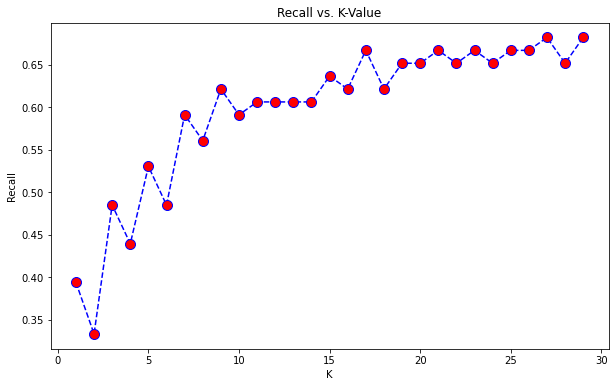

In [49]:
usc.cb_check_knn_performance_rate(xylist)

In [58]:
knn_mod,knn_err=usc.cc_conduct_knn(xylist,27)

In [59]:
knn_err

,Error_metric,Train,Test
0,Accuracy,0.79,0.61
1,Precision,0.72,0.23
2,Recall,0.95,0.68


Maximum accuracy:- 0.5151515151515151 at depth = 1


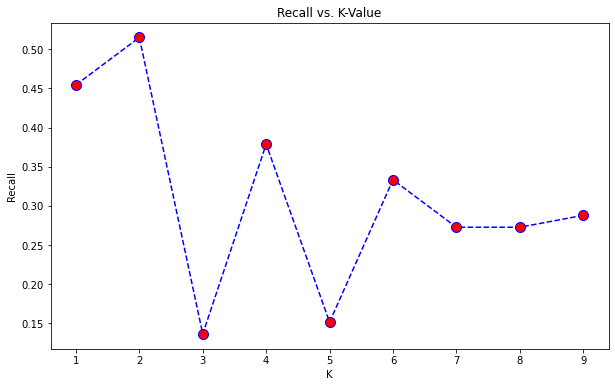

In [60]:
usc.da_check_dt_performance_rate(xylist)